# Polyphonic data visualization

## 1 Load meta file (onset, offset, labels)

In [1]:
import pandas as pd
meta = pd.read_csv('E:\\Xception\\TUT-SED-synthetic-2016\\meta.txt', delimiter = "\t", header=None)
meta.columns = ["file", "drop1", "onset", "offset", "label", "drop2"]
# delete not useful columns
meta = meta.drop(columns=["drop1", "drop2"])

## 2 Mel spectrogram

E:\anaconda3\envs\plaidML\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
E:\anaconda3\envs\plaidML\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

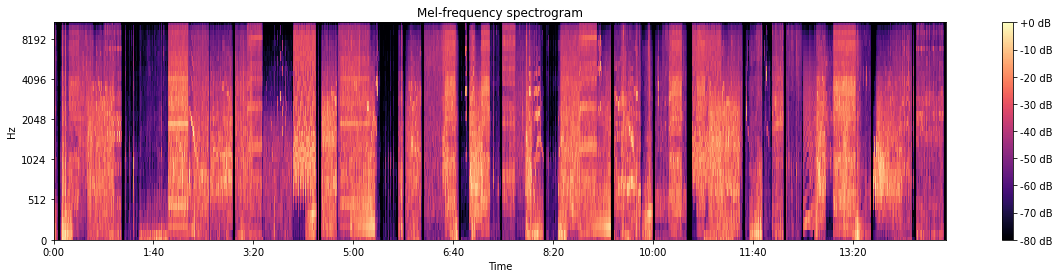

In [2]:
# Load various imports 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import librosa
import librosa.display

num_frames = []

directory = 'E:\\Xception\\TUT-SED-synthetic-2016\\audio\\'

i = 0

file_name = directory+'TUT-SED-synthetic-2016-mix-'+str(i)+'.wav'
        
# load single audio file
audio, sr = librosa.load(file_name, res_type='kaiser_fast')

# extract mfcc features with 20ms frame and 50% overlap at 22050 Hz
ms = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=440, hop_length=220, n_mels=40)

# save audio number of frames for labelling process
num_frames.append(ms.shape[1])

fig, ax = plt.subplots(figsize=(20, 4))
ms_dB = librosa.power_to_db(ms, ref=np.max)
img = librosa.display.specshow(ms_dB, x_axis='time',
                         y_axis='mel', sr=sr, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

## 3 Labels associated to spectrogram

In [3]:
#labelling matrix creation, this is done due to poliphony of data

import numpy as np

num_classes = meta['label'].nunique()
labels = []

#length of splitted subvectors
length = 1024

# to transform literal label to a numerical value
label_switch = {"alarms_and_sirens" : 0,
                "baby_crying" : 1,
                "bird_singing" : 2,
                "bus" : 3,
                "cat_meowing" : 4,
                "crowd_applause" : 5,
                "crowd_cheering" : 6,
                "dog_barking" : 7,
                "footsteps" : 8,
                "glass_smash" : 9,
                "gun_shot" : 10,
                "horsewalk" : 11,
                "mixer" : 12,
                "motorcycle" : 13,
                "rain" : 14,
                "thunder" : 15,        
}

file_name = directory+'TUT-SED-synthetic-2016-mix-'+str(i)+'.wav'

# initialize matrices with zeros
single_labels = np.zeros((num_classes, num_frames[i]), dtype=int)

# extract metadata of single audio file
query_name = file_name[len('E:\\Xception\\TUT-SED-synthetic-2016\\audio\\'):]
query_name = 'audio/' + query_name
subdf = meta.query('file==@query_name')
    
# populate matrix based on meta file
# more efficient to do it starting from metafile instead of iterating on the matrix since 
# features are less than the matrix and there are more zeros than ones at the end of 
# the process
onset = np.array(subdf.loc[:, 'onset'])
offset = np.array(subdf.loc[:, 'offset'])
labeldf = np.array(subdf.loc[:, 'label'])
    
for j in range(onset.shape[0]):
    # metadata values are in seconds so transform in 10ms intervals
    start = int(onset[j]*100)
    end = int(offset[j]*100)
    # label based on start and end of the single audio
    for k in range(end-start):
        single_labels[label_switch[labeldf[j]]][k+start] = 1

## 4 Plot class labels over time

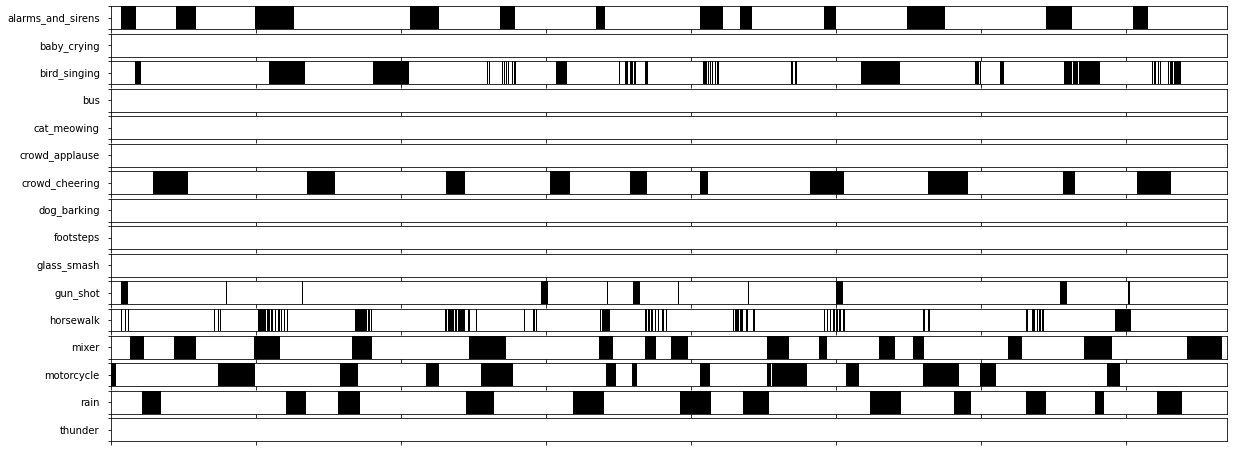

In [7]:
# Create the scheleton for the image
fig, ax = plt.subplots(16,figsize=(20, 8), sharex=True)

# Pick label name from iteration number
label_switch = {0: "alarms_and_sirens",
                1:"baby_crying",
                2:"bird_singing",
                3:"bus",
                4:"cat_meowing",
                5:"crowd_applause",
                6:"crowd_cheering",
                7:"dog_barking",
                8:"footsteps",
                9:"glass_smash",
                10:"gun_shot",
                11:"horsewalk",
                12:"mixer",
                13:"motorcycle",
                14:"rain",
                15:"thunder",        
}

# Parameters for class graphs
barprops = dict(aspect='auto', cmap='binary', interpolation='nearest')

for i in range(16):

    # pick a different class for each iteration
    y = single_labels[i]
    
    # Add class names
    ax[i].set_ylabel(label_switch[i], rotation='horizontal',horizontalalignment='right',verticalalignment='center')
    
    # Turn off tick labels
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    
    # Show the plot
    ax[i].imshow(y.reshape((1, -1)), **barprops)

## 5 Combine graphs

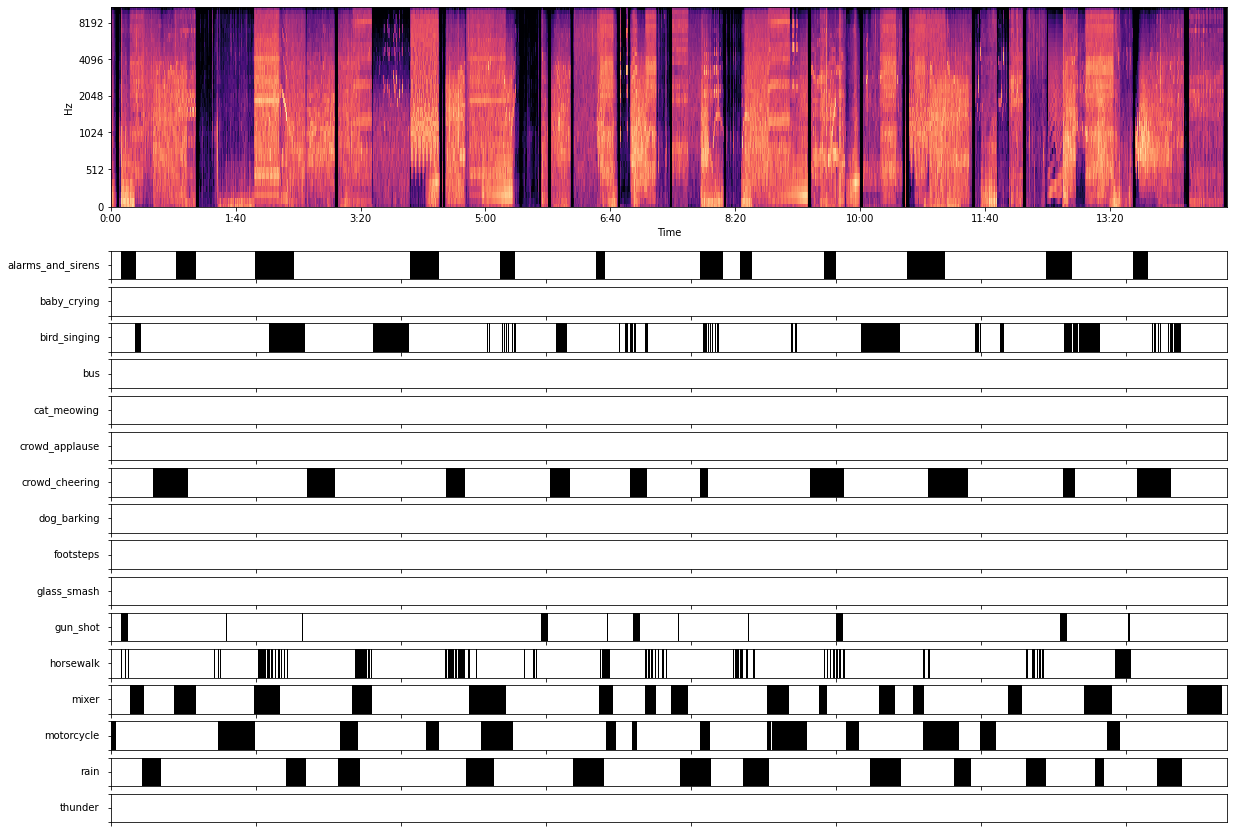

In [16]:
# Create the scheleton for the image
fig, ax = plt.subplots(18,figsize=(20, 15),gridspec_kw={'height_ratios': [7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]})#, sharex=True)

# Pick label name from iteration number
label_switch = {0: "alarms_and_sirens",
                1:"baby_crying",
                2:"bird_singing",
                3:"bus",
                4:"cat_meowing",
                5:"crowd_applause",
                6:"crowd_cheering",
                7:"dog_barking",
                8:"footsteps",
                9:"glass_smash",
                10:"gun_shot",
                11:"horsewalk",
                12:"mixer",
                13:"motorcycle",
                14:"rain",
                15:"thunder",        
}

# Parameters for class graphs
barprops = dict(aspect='auto', cmap='binary', interpolation='nearest')

# Mel spectrogram
img = librosa.display.specshow(ms_dB, x_axis='time',
                         y_axis='mel', sr=sr, ax=ax[0])

# Add a space between spectrogram and classes
ax[1].set_axis_off()

for i in range(16):

    # pick a different class for each iteration
    y = single_labels[i]

    # Add class names
    ax[i+2].set_ylabel(label_switch[i], rotation='horizontal',horizontalalignment='right',verticalalignment='center')
    
    # Turn off tick labels
    ax[i+2].set_yticklabels([])
    ax[i+2].set_xticklabels([])
    
    # Show the plot
    ax[i+2].imshow(y.reshape((1, -1)), **barprops)